<a href="https://colab.research.google.com/github/ameliachoi/python-ml-guide/blob/main/learningspoons%2B03%2Bregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Regression 회귀

## Regression list

* Linear Regression
* Ridge Linear Regression (L1)
* Lasso Linear Regression (L2)

* MLP Regression
* Support Vector Machine Regression
* RandomForest Regression
* XGBoost Regression
* LGBM Regression

## Evaluation 

* R-square
* MAE, MSE, RMSE

---

In [1]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [2]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
train = join('FIFA', 'train.csv')
test = join('FIFA', 'test.csv')

In [4]:
data = pd.read_csv(train)
label = data['value']

x_test = pd.read_csv(test)

#### 데이터 정보
    FIFA_train.csv : 축구선수의 정보와 능력치 그리고 이적시장 가격이 포함된 데이터
    FIFA_test.csv : 축구선수의 정보와 능력치가 포함된 데이터 해당 데이터의 선수들의 이적료를 예측해 주시면 됩니다.
    submission.csv : 답안지의 형식

    id : 선수 고유의 아이디
    name : 이름
    age : 나이
    continent : 선수들의 국적이 포함되어 있는 대륙입니다
    contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
    position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
    prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
    reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
    stat_overall : 선수의 현재 능력치 입니다.
    stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
    stat_skill_moves : 선수의 개인기 능력치 입니다.
    value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

In [5]:
data.head(3)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
data.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [8]:
x_test.head(3)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0


In [9]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [10]:
x_test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


In [11]:
data.shape, x_test.shape

((8932, 12), (3828, 11))

#### 불필요한 칼럼 삭제

In [12]:
data.drop(columns = ['id', 'value', 'name'], inplace=True)
x_test.drop(columns = ['id', 'name'], inplace=True)

#### 수치/범주형 변수 분류

In [13]:
data.dtypes == 'O' # 범주형 변수이면 true

age                 False
continent            True
contract_until       True
position             True
prefer_foot          True
reputation          False
stat_overall        False
stat_potential      False
stat_skill_moves    False
dtype: bool

In [14]:
cat_columns = [c for (c, t) in zip(data.dtypes.index, data.dtypes) if t == 'O']
num_columns = [c for c in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n Numeric Columns: \n{}\n'.format(cat_columns, num_columns))

Categorical Columns: 
['continent', 'contract_until', 'position', 'prefer_foot']
 Numeric Columns: 
['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']



#### missing values

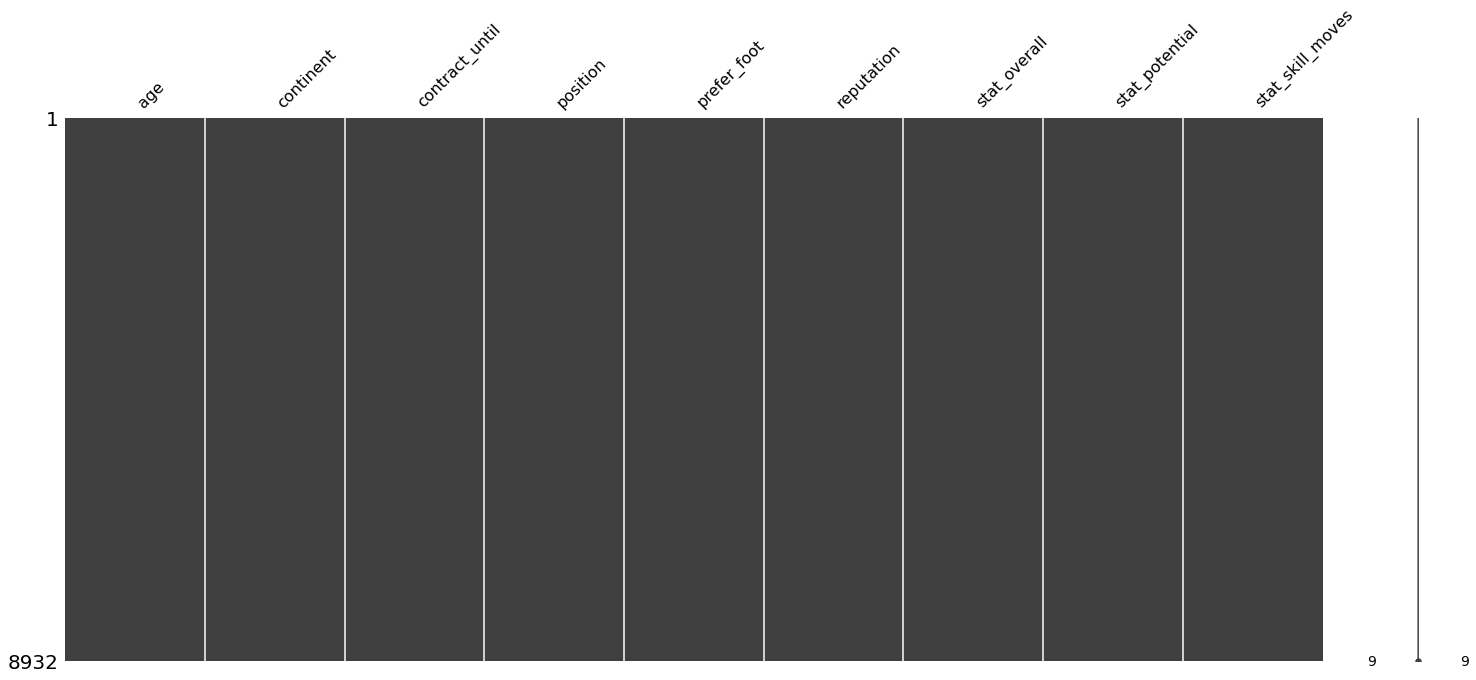

In [15]:
import missingno as msno
msno.matrix(data)

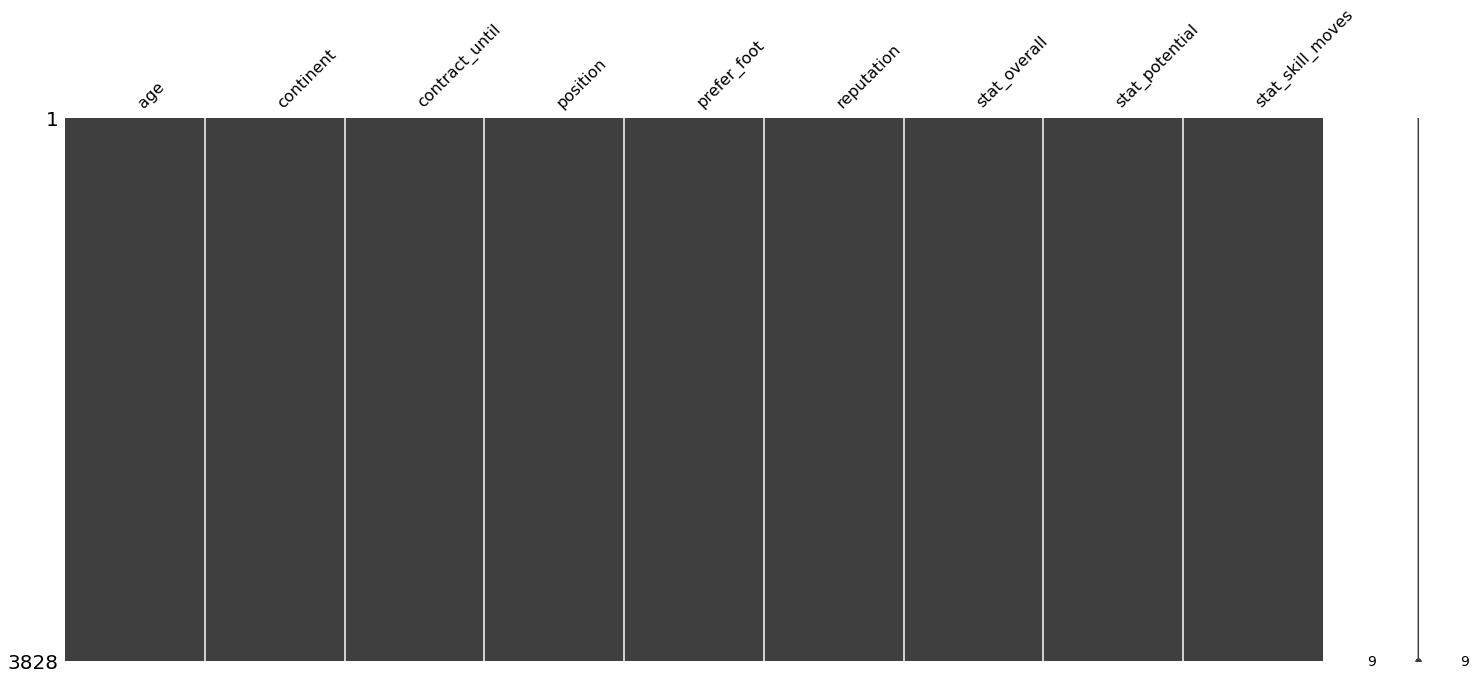

In [16]:
msno.matrix(x_test)

In [17]:
data.isna().sum()

age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [18]:
x_test.isna().sum()

age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

* 결측치 없음

#### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[num_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
data[num_columns] = scaler.transform(data[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

In [21]:
data.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,8.932000e+03,8.932000e+03,8.932000e+03,8.932000e+03,8.932000e+03
mean,-7.886611e-15,4.642888e-14,3.397292e-15,-1.529353e-16,-1.110065e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.986759e+00,-3.088428e-01,-2.931075e+00,-4.007675e+00,-1.806307e+00
25%,-9.080698e-01,-3.088428e-01,-5.968513e-01,-6.675562e-01,-5.176541e-01
50%,-4.511848e-02,-3.088428e-01,-1.329530e-02,4.674371e-04,-5.176541e-01
75%,6.020950e-01,-3.088428e-01,7.161497e-01,6.684911e-01,7.709987e-01
max,3.190949e+00,9.130280e+00,3.925708e+00,3.674598e+00,3.348304e+00


In [22]:
x_test.describe()

,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,0.019129,0.030823,0.035868,0.018442,0.016928
std,0.998486,1.058279,1.007920,1.024319,1.006635
min,-1.986759,-0.308843,-2.931075,-3.339651,-1.806307
25%,-0.692332,-0.308843,-0.596851,-0.667556,-0.517654
50%,-0.045118,-0.308843,-0.013295,0.000467,-0.517654
75%,0.817833,-0.308843,0.716150,0.668491,0.770999
max,3.622425,9.130280,3.925708,3.841604,3.348304


#### train/valid set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, label,
                                                     test_size=.3,
                                                     random_state=1995,
                                                     shuffle=True)

In [24]:
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)

#### Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
# ValueError: Found unknown categories ['Dec 31, 2019', 'Jun 1, 2019'] in column 1 during transform <- 에러 발생
# contract_until 컬럼의 범주 데이터 전처리
data['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
May 31, 2020       1
2026               1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [27]:
# 뒤에서 4글자까지 연도만 필요함, 전처리 진행
x_all = pd.concat([x_train[cat_columns],
                   x_valid[cat_columns],
                   x_test[cat_columns]], axis=0)

x_all['contract_until'] = x_all['contract_until'].map(lambda x: x[-4:])

In [28]:
ohe = OneHotEncoder(sparse=False)
new_x_all = ohe.fit_transform(x_all)

ohe_columns = ohe.categories_[0].tolist()
for idx in range(len(ohe.categories_) -1):
  ohe_columns += ohe.categories_[idx+1].tolist()
ohe_columns

['africa',
 'asia',
 'europe',
 'oceania',
 'south america',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025',
 '2026',
 'DF',
 'GK',
 'MF',
 'ST',
 'left',
 'right']

In [29]:
new_x_all.shape, x_all.shape

((12760, 20), (12760, 4))

In [30]:
new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)
new_x_all.head()

,africa,asia,europe,oceania,south america,2018,2019,2020,2021,2022,2023,2024,2025,2026,DF,GK,MF,ST,left,right
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
new_x_train_cat = new_x_all.iloc[:x_train.shape[0], :]
new_x_valid_cat = new_x_all.iloc[x_train.shape[0]:new_x_all.shape[0] - x_test.shape[0], :]
new_x_test_cat = new_x_all.iloc[new_x_all.shape[0] - x_test.shape[0]:, :]

In [32]:
new_x_train_cat.shape, x_train.shape

((6252, 20), (6252, 9))

In [33]:
new_x_valid_cat.shape, x_valid.shape

((2680, 20), (2680, 9))

In [34]:
new_x_test_cat.shape, x_test.shape

((3828, 20), (3828, 9))

In [35]:
# 인덱스 초기화
new_x_train_cat.reset_index(drop=True, inplace=True)
new_x_valid_cat.reset_index(drop=True, inplace=True)
new_x_test_cat.reset_index(drop=True, inplace=True)

In [36]:
# 기존 범주형 변수 제거, 새로운 변수 추가
x_train.drop(columns = cat_columns, inplace=True)
x_valid.drop(columns = cat_columns, inplace=True)
x_test.drop(columns = cat_columns, inplace=True)

In [37]:
x_train = pd.concat([x_train, new_x_train_cat], axis=1)
x_valid = pd.concat([x_valid, new_x_valid_cat], axis=1)
x_test = pd.concat([x_test, new_x_test_cat], axis=1)

In [38]:
# 확인
x_train.head(3)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,africa,asia,europe,oceania,south america,2018,2019,2020,2021,2022,2023,2024,2025,2026,DF,GK,MF,ST,left,right
0,-0.476594,-0.308843,0.862039,1.336515,0.770999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.386357,-0.308843,-0.305073,-1.168574,0.770999,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.170619,-0.308843,-0.596851,-1.502586,-0.517654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


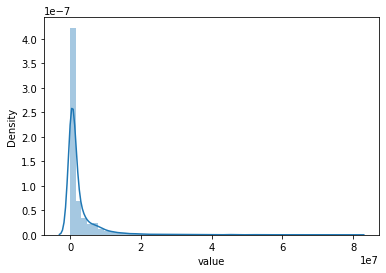

In [39]:
# 라벨 변수 분포 확인하기
import seaborn as sns

sns.distplot(y_train)

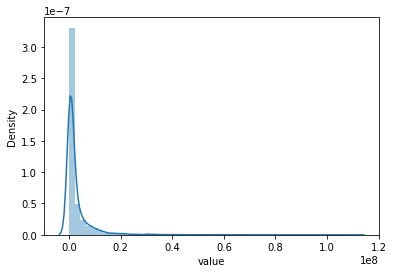

In [40]:
sns.distplot(y_valid)

In [41]:
# log 변환
y_train = np.log1p(y_train)
y_valid = np.log1p(y_valid)

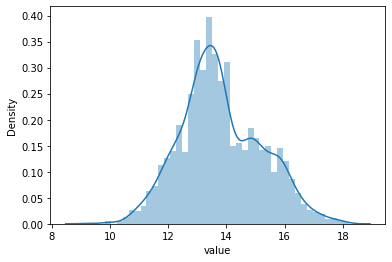

In [42]:
sns.distplot(y_train)

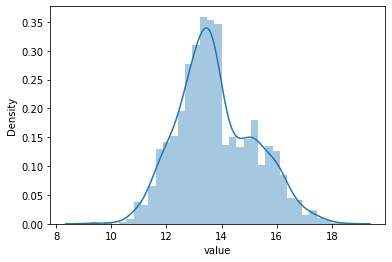

In [43]:
sns.distplot(y_valid)

---

### Linear Regression

[선형 회귀분석의 4가지 기본 가정](https://kkokkilkon.tistory.com/175)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred_lr = lr.predict(x_valid)

In [47]:
from sklearn.metrics import r2_score
print('Linear Regression R-sqaure score : {:.4f}'.format(r2_score(y_valid, pred_lr)))

Linear Regression R-sqaure score : 0.9711


In [48]:
# 계수와 절편 살펴보기
print('Linear Regression Coefficient: {}, Intercept: {:.4f}'.format(lr.coef_, lr.intercept_))

Linear Regression Coefficient: [-4.74454198e-01 -3.46332015e-03  1.55752418e+00 -4.63853960e-02
  2.65914636e-02 -3.51328931e-04  1.40781690e-02 -2.01164094e-02
  3.35952128e-03  3.03004801e-03  5.37476151e-02  5.43049470e-02
  8.26055443e-02  8.49758490e-02  6.66019667e-02  2.19787168e-02
 -2.35213359e-01  5.43127408e-02 -1.83314021e-01 -5.84421888e-02
 -1.35721895e-01  7.13580599e-02  1.22806024e-01 -6.07984290e-03
  6.07984290e-03], Intercept: 13.7144


### Lasso

* Lasso는 기존 선형회귀 모델에서 손실 함수에 L1 정규화 항 추가
* 특정 coefficient가 매우 낮으면 해당 값을 0으로 만듬

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [50]:
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
pred_lasso = lasso.predict(x_valid)

In [52]:
print('Lasso R-sqaure score: {:.4f}'.format(r2_score(y_valid, pred_lasso)))

Lasso R-sqaure score: 0.3698


In [53]:
print('Lasso Coefficient: {}, Intercept: {:.4f}'.format(lasso.coef_, lasso.intercept_))

Lasso Coefficient: [ 0.          0.          0.30830469  0.          0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.        ], Intercept: 13.7988


### Ridge

* Ridge는 기존 선형회귀 모델에서 손실 함수에 L2 정규화 항 추가
* 영향을 거의 미치지 않는 변수를 0에 가까운 값으로 수렴시킴 (0이 아님)

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [55]:
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
pred_ridge = ridge.predict(x_valid)

In [57]:
print('Ridge R-square score: {:.4f}'.format(r2_score(y_valid, pred_ridge)))

Ridge R-square score: 0.9711


In [58]:
print('Ridge Coefficient: {}, Intercept: {:.4f}'.format(ridge.coef_, ridge.intercept_))

Ridge Coefficient: [-4.72797643e-01 -3.53019776e-03  1.55502472e+00 -4.46111031e-02
  2.70872510e-02 -1.69613269e-04  1.39086757e-02 -2.00587232e-02
  3.32904059e-03  2.99062019e-03  3.99899410e-02  4.06647992e-02
  6.91382121e-02  7.14853463e-02  5.33915822e-02  8.67699670e-03
 -2.16042642e-01  3.00004562e-02 -9.73046921e-02 -5.83058857e-02
 -1.35266224e-01  7.10534947e-02  1.22518616e-01 -6.12930654e-03
  6.12930654e-03], Intercept: 13.7279


### Multi Layer Perceptron Regressor

In [59]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()

In [60]:
mlp.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [61]:
pred_mlp = mlp.predict(x_valid)

In [62]:
print('simple MLP regressor R-square Score: {:.4f}'.format(r2_score(y_valid, pred_mlp)))

simple MLP regressor R-square Score: 0.9932


In [63]:
print('MLP Coefficient and Intercept : {}'.format(mlp.coefs_))

MLP Coefficient and Intercept : [array([[ 0.09025088,  0.40252942, -0.1512851 , ...,  0.04350027,
        -0.16681102, -0.20659126],
       [ 0.02940698,  0.05070576, -0.08465993, ...,  0.10473275,
         0.09021432,  0.06360382],
       [ 0.29008564, -0.14247685, -0.99983668, ...,  0.27287609,
         0.03459527, -0.02632106],
       ...,
       [-0.00925879,  0.06805087,  0.00815686, ...,  0.02118996,
         0.29080278,  0.04346528],
       [-0.03287745, -0.08846323,  0.12190825, ...,  0.36112441,
         0.18906323,  0.11002258],
       [ 0.34271352,  0.05886449,  0.12163729, ...,  0.12875541,
         0.24905058,  0.34273849]]), array([[ 0.39296259],
       [-0.15952455],
       [ 0.17116646],
       [-0.21353796],
       [ 0.24196448],
       [ 0.38929687],
       [-0.03427698],
       [-0.09553108],
       [ 0.27406365],
       [-0.18432057],
       [ 0.03397625],
       [ 0.2502867 ],
       [-0.11002743],
       [ 0.37865428],
       [-0.11450838],
       [ 0.35259116],
 

### Support Vector Machine Regressor

In [64]:
from sklearn.svm import SVR
svr = SVR()

In [65]:
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
pred_svr = svr.predict(x_valid)

In [67]:
print('Support Vector Machine R-square score: {:.4f}'.format(r2_score(y_valid, pred_svr)))

Support Vector Machine R-square score: 0.9892


### Random Forest , XGBoost Regressor, LGBM Regressor

### Evaluation

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

preds = [pred_lr, pred_ridge, pred_lasso, pred_mlp, pred_mlp]

for pred in preds:
  print('r2 score : {:.3f}'.format(r2_score(y_valid, pred)))
  print('MAE      : {:.6f}'.format(mean_absolute_error(y_valid, pred)))
  print('MSE      : {:.6f}'.format(mean_squared_error(y_valid, pred)))
  print('RMSE     : {:.6f}'.format(np.sqrt(mean_squared_error(y_valid, pred))))
  print('------------')

r2 score : 0.971
MAE      : 0.179981
MSE      : 0.056870
RMSE     : 0.238474
------------
r2 score : 0.971
MAE      : 0.179843
MSE      : 0.056829
RMSE     : 0.238389
------------
r2 score : 0.370
MAE      : 0.890804
MSE      : 1.240564
RMSE     : 1.113806
------------
r2 score : 0.993
MAE      : 0.084424
MSE      : 0.013387
RMSE     : 0.115704
------------
r2 score : 0.993
MAE      : 0.084424
MSE      : 0.013387
RMSE     : 0.115704
------------
